<a href="https://colab.research.google.com/github/Pa1kalyanv/Loan-Risk-Detection/blob/main/Recsify_Technologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the JSON file
df = pd.read_json('/content/drive/MyDrive/RT RISK DETECTION/loan_approval_dataset.json')

# Display the first few rows of the data
print(df.head())

   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


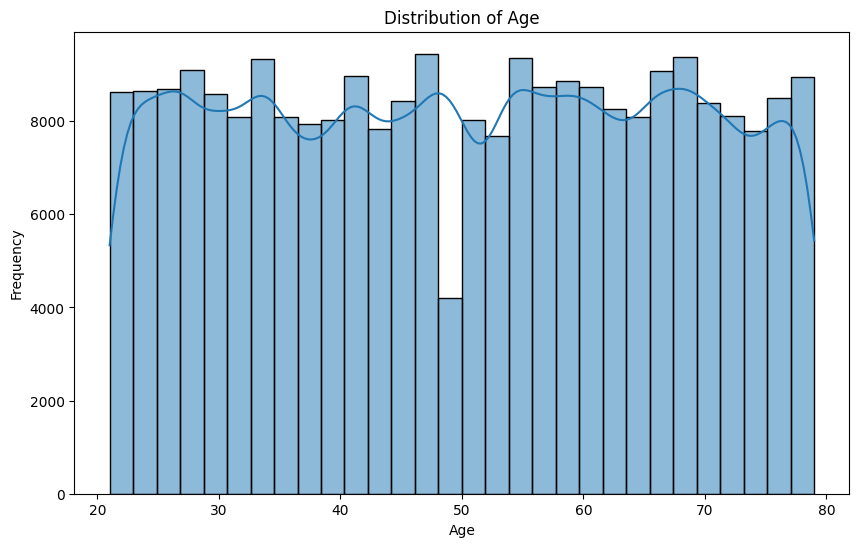

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



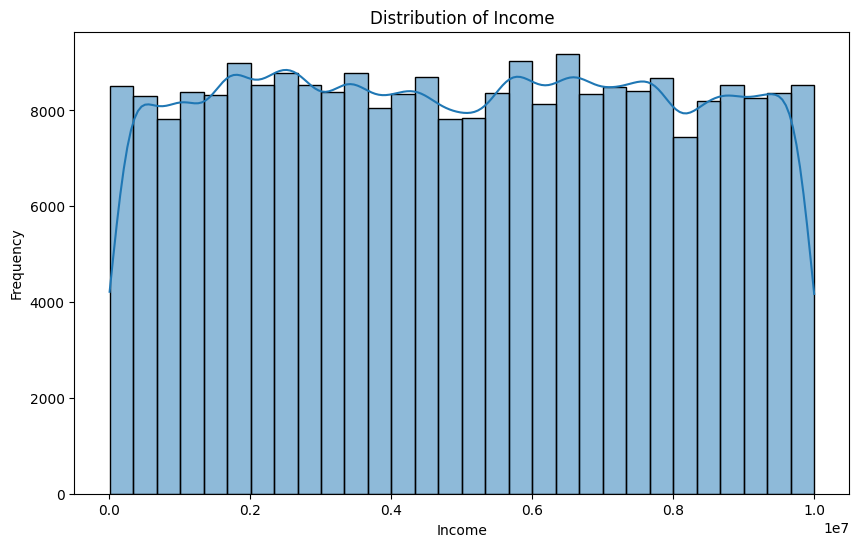

In [ ]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



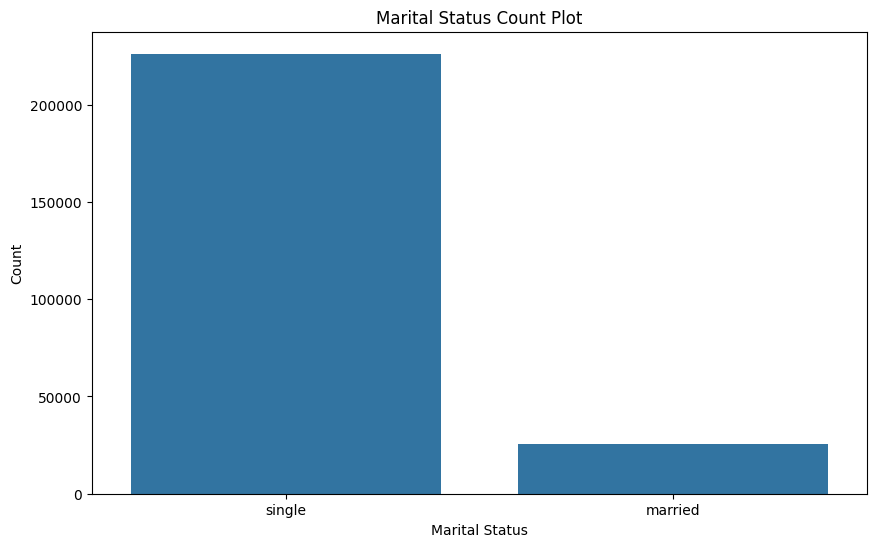

In [ ]:
# Marital Status Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Married/Single', data=df)
plt.title('Marital Status Count Plot')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



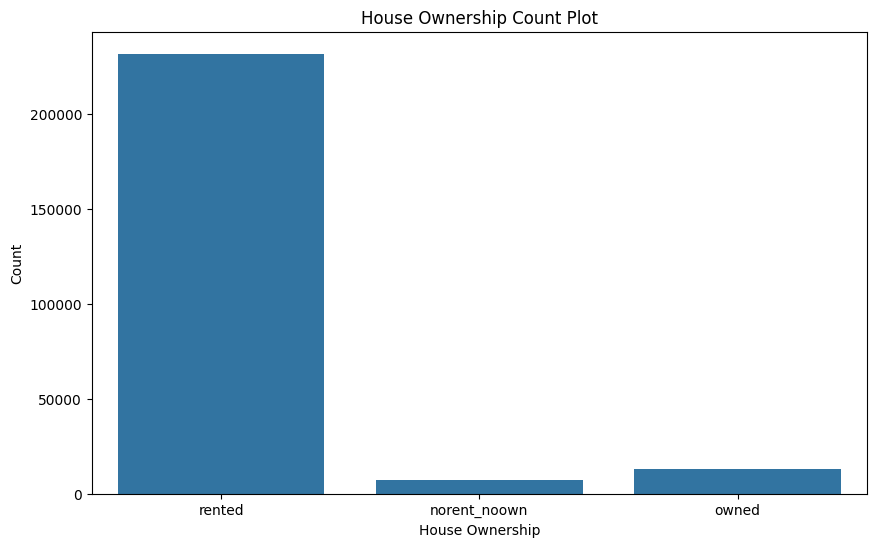

In [ ]:
# House Ownership Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='House_Ownership', data=df)
plt.title('House Ownership Count Plot')
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.show()



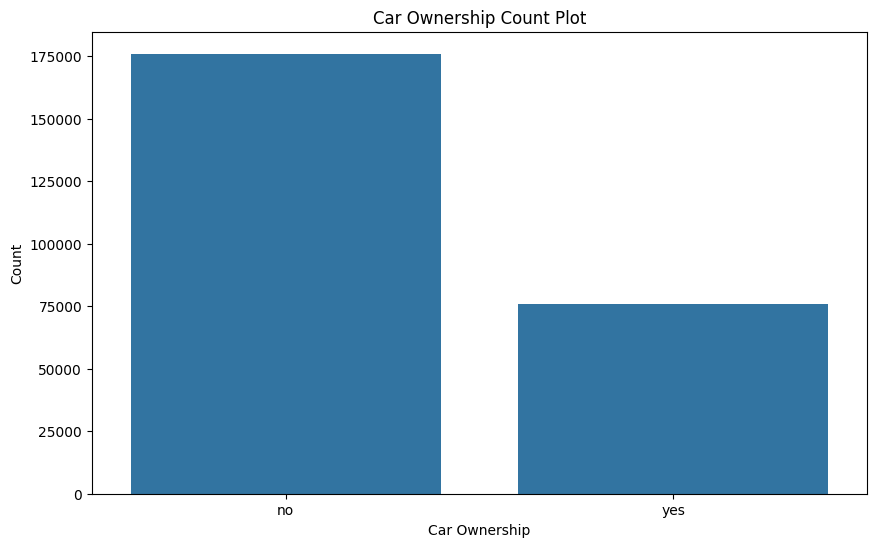

In [ ]:
# Car Ownership Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Car_Ownership', data=df)
plt.title('Car Ownership Count Plot')
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import re

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], drop_first=True)

# Clean the feature names
df_encoded.columns = [re.sub(r'[\[\]<>]', '', col) for col in df_encoded.columns]

# Split the data into features and target
X = df_encoded.drop(['Id', 'Risk_Flag'], axis=1)
y = df_encoded['Risk_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the numerical features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     66301
           1       0.53      0.57      0.55      9299

    accuracy                           0.89     75600
   macro avg       0.74      0.75      0.74     75600
weighted avg       0.89      0.89      0.89     75600



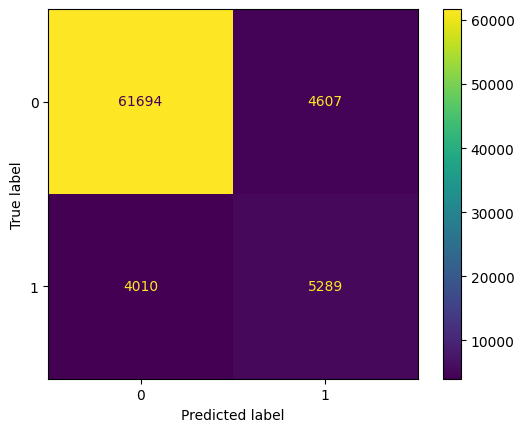

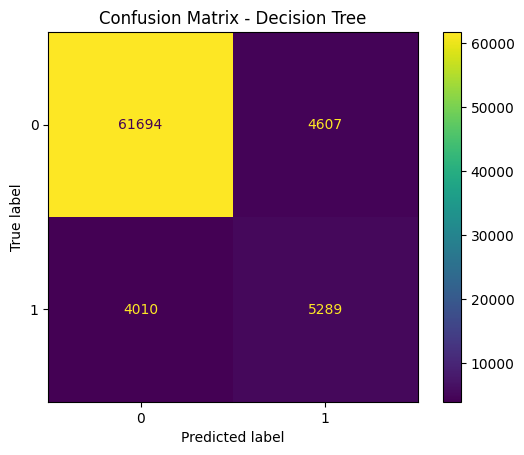

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
disp.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.54      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



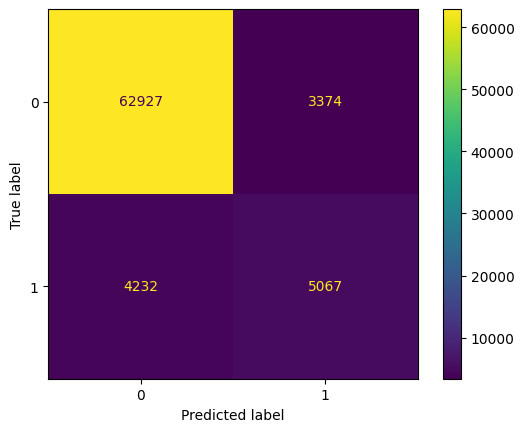

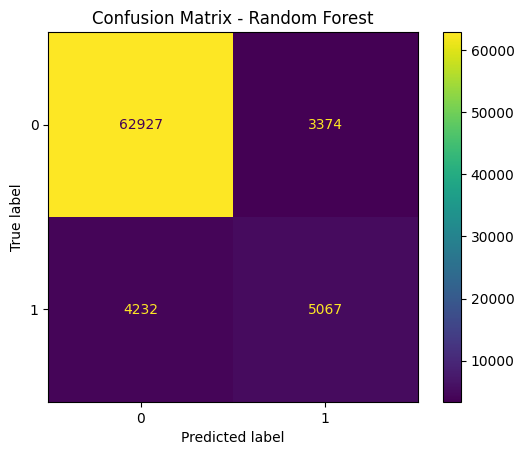

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
disp.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66301
           1       0.65      0.06      0.10      9299

    accuracy                           0.88     75600
   macro avg       0.77      0.53      0.52     75600
weighted avg       0.85      0.88      0.83     75600



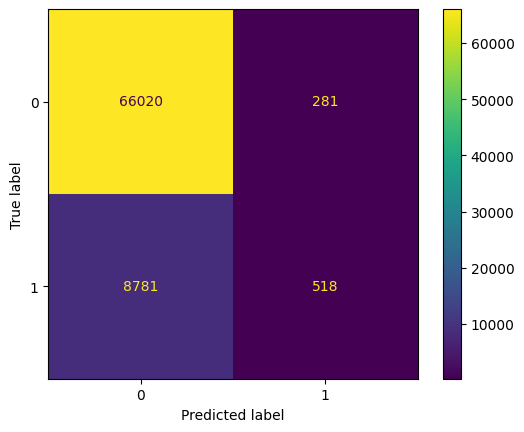

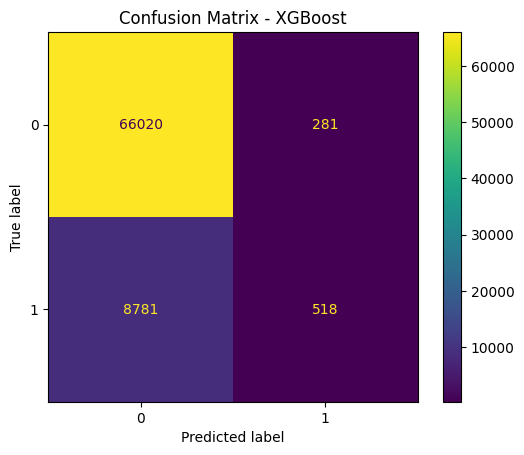

In [ ]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
disp.plot()
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [ ]:
# Feature importance for Random Forest
importances_rf = rf_model.feature_importances_
feature_names_rf = X_train.columns
important_features_rf = pd.Series(importances_rf, index=feature_names_rf).sort_values(ascending=False)
print("Top 10 Features Influencing Risk - Random Forest:")
print(important_features_rf.head(10))

# Feature importance for XGBoost
importances_xgb = xgb_model.feature_importances_
feature_names_xgb = X_train.columns
important_features_xgb = pd.Series(importances_xgb, index=feature_names_xgb).sort_values(ascending=False)
print("Top 10 Features Influencing Risk - XGBoost:")
print(important_features_xgb.head(10))


Top 10 Features Influencing Risk - Random Forest:
Income                   0.103676
Age                      0.087716
Experience               0.065803
CURRENT_JOB_YRS          0.061497
CURRENT_HOUSE_YRS        0.053668
Car_Ownership_yes        0.014842
Married/Single_single    0.008510
STATE_Uttar_Pradesh      0.005783
STATE_Bihar              0.005309
STATE_West_Bengal        0.005263
dtype: float64
Top 10 Features Influencing Risk - XGBoost:
CITY_Burhanpur             0.014233
CITY_Saharanpur            0.010972
CITY_Deoghar               0.010260
CITY_Kakinada              0.008956
CITY_Ballia                0.008601
STATE_Jammu_and_Kashmir    0.008429
CITY_Faridabad             0.008385
CITY_Ratlam                0.007553
CITY_Etawah                0.007385
CITY_Panipat               0.006959
dtype: float32


In [ ]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Accuracy - Decision Tree:", accuracy_dt)
print("Accuracy - Random Forest:", accuracy_rf)
print("Accuracy - XGBoost:", accuracy_xgb)

# Feature importance for Decision Tree
importances_dt = dt_model.feature_importances_
feature_names_dt = X_train.columns
important_features_dt = pd.Series(importances_dt, index=feature_names_dt).sort_values(ascending=False)
print("Top 10 Features Influencing Risk - Decision Tree:")
print(important_features_dt.head(10))



Accuracy - Decision Tree: 0.8860185185185185
Accuracy - Random Forest: 0.8993915343915344
Accuracy - XGBoost: 0.8801322751322751
Top 10 Features Influencing Risk - Decision Tree:
Income                             0.139966
Age                                0.106610
Experience                         0.061692
CURRENT_HOUSE_YRS                  0.053816
CURRENT_JOB_YRS                    0.051429
Car_Ownership_yes                  0.015986
Married/Single_single              0.008206
Profession_Hotel_Manager           0.005421
Profession_Chartered_Accountant    0.005316
Profession_Technical_writer        0.005227
dtype: float64
Top 10 Features Influencing Risk - Random Forest:
Income                   0.103676
Age                      0.087716
Experience               0.065803
CURRENT_JOB_YRS          0.061497
CURRENT_HOUSE_YRS        0.053668
Car_Ownership_yes        0.014842
Married/Single_single    0.008510
STATE_Uttar_Pradesh      0.005783
STATE_Bihar              0.005309
STATE_West